In [1]:
#IMPORT ALL THE REQUIRED LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
%matplotlib inline

In [2]:
#READ THE DATA FILE

lines=[]
with open("data.txt",'r') as f:
    for line in f.readlines():
        lines.append(line)
    
    
        
print(lines[:6])

['Good morning everyone and thanks for joining us\n', 'I want to start our call today by looking back\n', '2016 was a transformative year for us\n', 'Transformations are difficult, and this one was especially challenging\n', 'We started 2016 by resetting and focusing on why people use Twitter\n', "It's the fastest way to see what's happening, and what everyone is talking about\n"]


In [3]:
# CREATE A DATA FRAME

speech = pd.DataFrame(lines,columns=["lines"])
print(speech.shape)
speech.head()

(113, 1)


,lines
0,Good morning everyone and thanks for joining us\n
1,I want to start our call today by looking back\n
2,2016 was a transformative year for us\n
3,"Transformations are difficult, and this one wa..."
4,We started 2016 by resetting and focusing on w...


In [4]:
# USE STOPWORDS TO REMOVE THE COMMONLY USED WORDS FROM THE DATA

stop=stopwords.words('english')
speech['cleanup'] = speech['lines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  #remove stop words
speech

,lines,cleanup
0,Good morning everyone and thanks for joining us\n,Good morning everyone thanks joining us
1,I want to start our call today by looking back\n,I want start call today looking back
2,2016 was a transformative year for us\n,2016 transformative year us
3,"Transformations are difficult, and this one wa...","Transformations difficult, one especially chal..."
4,We started 2016 by resetting and focusing on w...,We started 2016 resetting focusing people use ...
...,...,...
108,"So in closing, as I said, I've never been more...","So closing, I said, I've never sure value Twit..."
109,People trust us to carry some of the most impo...,"People trust us carry important conversations,..."
110,We've proven now that our focus works and we n...,We've proven focus works need apply approach r...
111,In doing so advances us towards our ultimate g...,In advances us towards ultimate goal building ...


In [5]:
# GET THE SENTIMENT SCORE OF EACH ROW

speech['sentiment'] = speech['cleanup'].map(lambda text: TextBlob(text).sentiment.polarity)
print(speech['sentiment'])
print("Maximum and Minimum sentiment scores are:")
print(speech['sentiment'].min(), speech['sentiment'].max())

0      0.45
1      0.00
2      0.00
3      0.25
4      0.00
       ... 
108   -0.25
109    0.40
110    0.00
111    0.00
112    0.00
Name: sentiment, Length: 113, dtype: float64
Maximum and Minimum sentiment scores are:
-0.4 0.7


(array([ 2.,  1.,  1., 50., 20., 17.,  8.,  7.,  6.,  1.]),
 array([-0.4 , -0.29, -0.18, -0.07,  0.04,  0.15,  0.26,  0.37,  0.48,
         0.59,  0.7 ]),
 <a list of 10 Patch objects>)

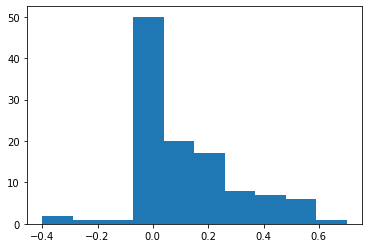

In [6]:
# PLOT HISTOGRAM

plt.hist(speech['sentiment'])

In [7]:
# GET THE NUMBERS IF THEY ARE PRESENT IN EACH ROW

speech['numbers']=speech['cleanup'].apply(lambda x:re.findall("\d+",x)) 
speech['numbers']

0          []
1          []
2      [2016]
3          []
4      [2016]
        ...  
108        []
109        []
110        []
111        []
112        []
Name: numbers, Length: 113, dtype: object

In [8]:
#STORE THE NUMBERS IN A LIST FOR EASY ACCESS


numbers=[]
rows=speech.shape[0]
for i in range(rows):
    if len(speech['numbers'][i])>0:
        numbers.append(speech['numbers'][i])
        
print(numbers)



[['2016'], ['2016'], ['2016'], ['2017'], ['2016'], ['2016'], ['10'], ['10'], ['12', '00'], ['27', '25'], ['28', '25'], ['1'], ['2016', '2015'], ['2016', '2017'], ['35', '40'], ['2016'], ['10'], ['2017'], ['10'], ['11']]


In [9]:
# GET THE NUMBER WITH THE MAX OCCURRENCE

from collections import defaultdict
number_count=defaultdict(int)
for i in range(len(numbers)):
    if len(numbers[i])>1:
        for j in range(len(numbers[i])):
            number_count[numbers[i][j]]+=1
    else:
        number_count[numbers[i][0]]+=1
number_count = {k: v for k, v in sorted(number_count.items(), key=lambda item: item[1],reverse=True)}

number_count




{'2016': 8,
 '10': 4,
 '2017': 3,
 '25': 2,
 '12': 1,
 '00': 1,
 '27': 1,
 '28': 1,
 '1': 1,
 '2015': 1,
 '35': 1,
 '40': 1,
 '11': 1}

In [10]:
print(speech['lines'].iloc[2])
speech['lines'].iloc[4]

2016 was a transformative year for us



'We started 2016 by resetting and focusing on why people use Twitter\n'